<a href="https://colab.research.google.com/github/habibzeeh/colab/blob/main/Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Refrence https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
#modules

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier


In [4]:
#Read Data from csv file
data = pd.read_csv("data.csv")


In [5]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
a = data['Age'].unique()
a.sort()
print(a)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


In [7]:
data_young = data.loc[data['Age'].isin([1,2,3,4,5,6])]
data_old = data.loc[data['Age'].isin([7,8,9,10,11,12,13])]

In [8]:
feature_cols = list(data.columns)
del feature_cols[0]

In [9]:
X_train = data_old[feature_cols]
X_test = data_young[feature_cols]
y_train = data_old['Diabetes_binary']
y_test = data_young['Diabetes_binary']

In [10]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[69707   562]
 [ 3525   426]]


Text(0.5, 257.44, 'Predicted label')

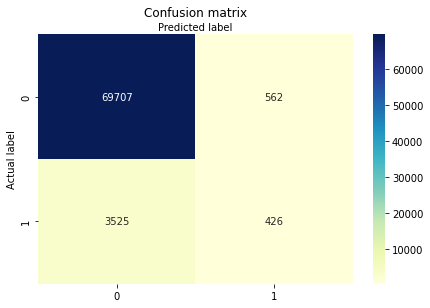

In [11]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9449339800592832
Precision: 0.4311740890688259
Recall: 0.10782080485952923


In [13]:
ages = []
stats = []
for i in range(1,14):
    data_age = data.loc[data['Age'] == i]
    total_size = len(data_age)
    t_size = len(data_age.loc[data['Diabetes_binary'] == 1])
    stats.append(t_size/total_size)
    ages.append(i)
#stats = stats[::-1] #reversing using list slicing

In [14]:
X = np.array(ages).reshape(-1,1)
y = np.array(stats).reshape(-1,1)

to_predict_x= [0]
to_predict_x= np.array(to_predict_x).reshape(-1,1)

regsr = LinearRegression()
regsr.fit(X,y)

predicted_y= regsr.predict(to_predict_x)
m= regsr.coef_
c= regsr.intercept_
print("Predicted y:\n",predicted_y)
print("slope (m): ",m)
print("y-intercept (c): ",c)

Predicted y:
 [[-0.01875518]]
slope (m):  [[0.01923508]]
y-intercept (c):  [-0.01875518]


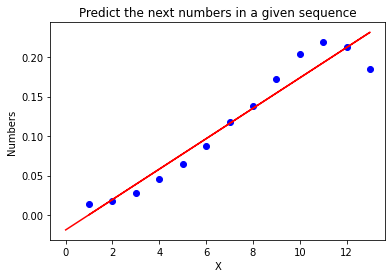

In [15]:
plt.title('Predict the next numbers in a given sequence')  
plt.xlabel('X')  
plt.ylabel('Numbers') 
plt.scatter(X,y,color="blue")
new_y=[ m*i+c for i in np.append(X,to_predict_x)]
new_y=np.array(new_y).reshape(-1,1)
plt.plot(np.append(X,to_predict_x),new_y,color="red")
plt.show()